In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

In [2]:
# read in the dataset

house = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')

In [3]:
# check the dataset

print(house.shape)
house.head()

(1928, 78)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf
0,109,533352170,60,RL,70.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,130500,2204.0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2009,WD,220000,3035.0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2010,WD,109000,2114.0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,174000,1828.0
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,138500,2121.0


In [4]:
# basic inferential stats of sale price

print('Sale Price Mean: ', np.mean(house['saleprice']))
print('Sale Price Median: ', np.median(house['saleprice'])) 
print('Sale Price Std. Dev.: ', np.std(house['saleprice'])) 

Sale Price Mean:  180746.61618257262
Sale Price Median:  160000.0
Sale Price Std. Dev.:  79480.97435983518


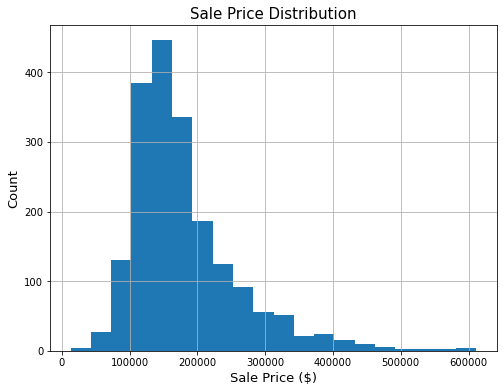

In [5]:
# sale price distribution

plt.figure(figsize = (8, 6))
house['saleprice'].hist(bins = 20)
plt.xlabel('Sale Price ($)', size = 13)
plt.ylabel('Count', size = 13)
plt.title('Sale Price Distribution', size = 15)
plt.savefig('../images/sale_hist.png');

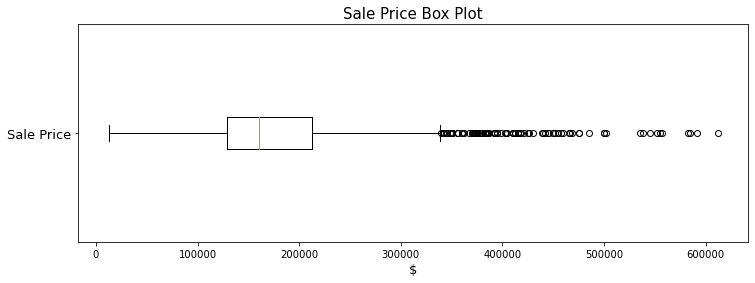

In [6]:
# sale price distribution in box plot

plt.figure(figsize = (12, 4))
plt.boxplot(x = house['saleprice'], vert = False)
plt.xlabel('$', size = 13)
plt.yticks(ticks = [1], labels = ['Sale Price'], size = 13)
plt.title('Sale Price Box Plot', size = 15)
plt.savefig('../images/sale_boxplot.png');

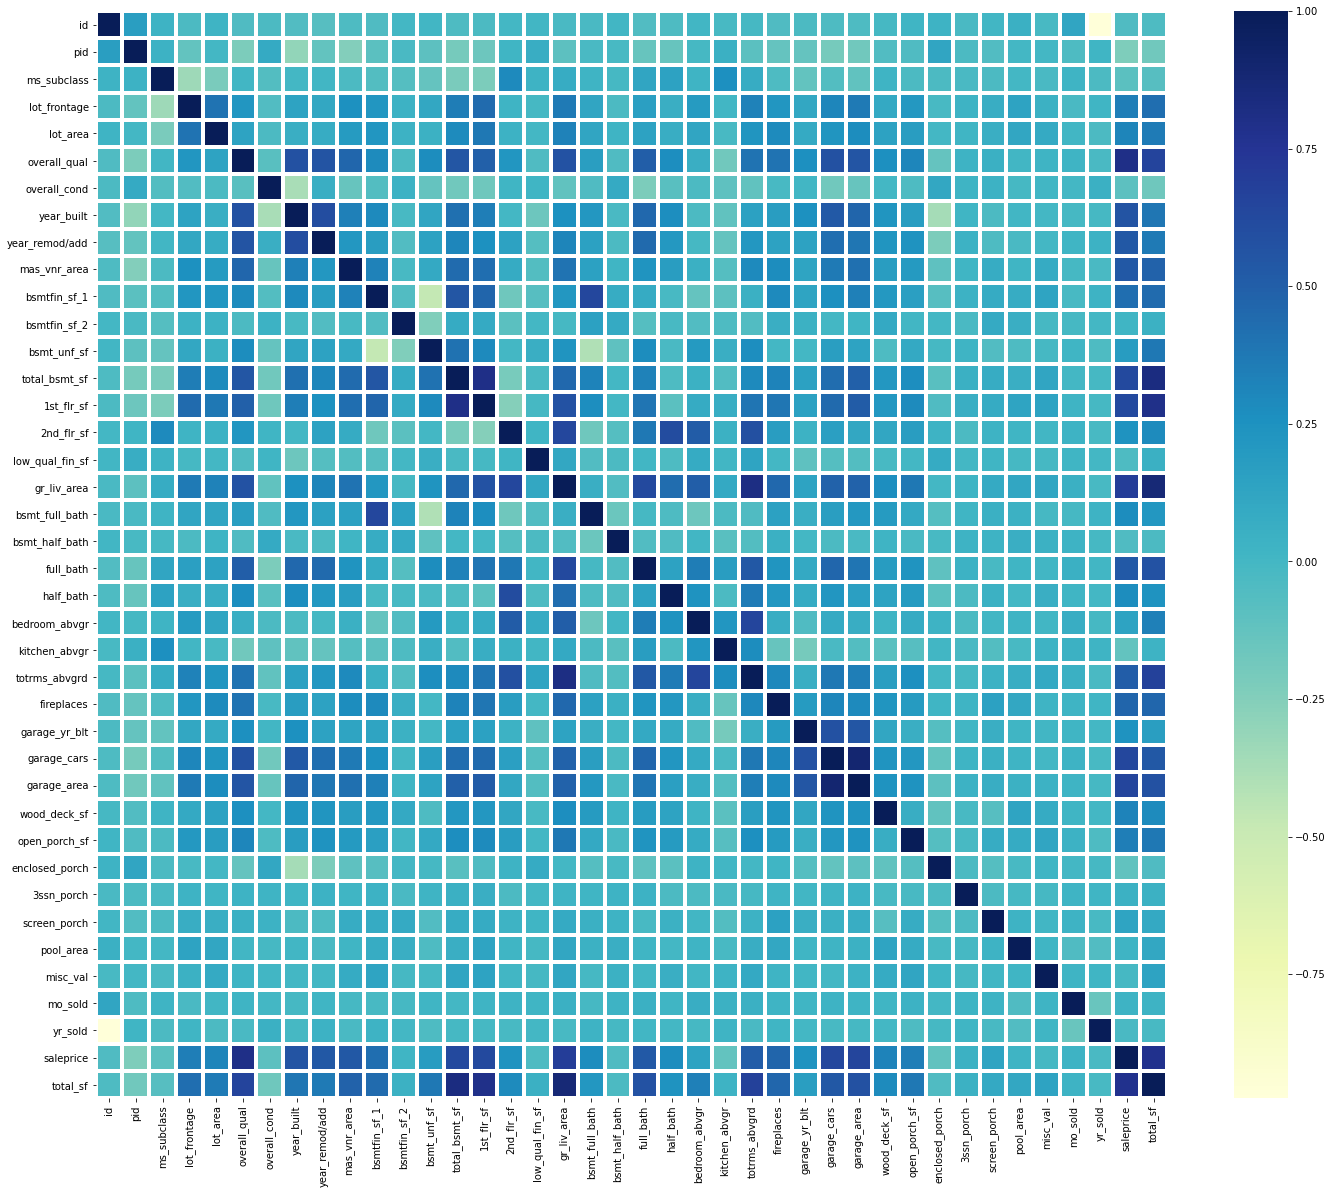

In [7]:
# check the correlation

plt.figure(figsize = (24, 20))
sns.heatmap(house.corr(), cmap="YlGnBu", linecolor = 'white', linewidths = 3, annot = False)
plt.savefig('../images/house_heatmap.png');

##### Strong factors 
1. Overall Quality
2. Total Sq. Ft. (We are excluding any other Sq. Ft. or number of rooms information due to high correlation to total.)
3. Year Built --> will have to calculate the age of the home.
4. Garage Area (We are not including garage_cars column since area and the number of cars show strong correlation.)

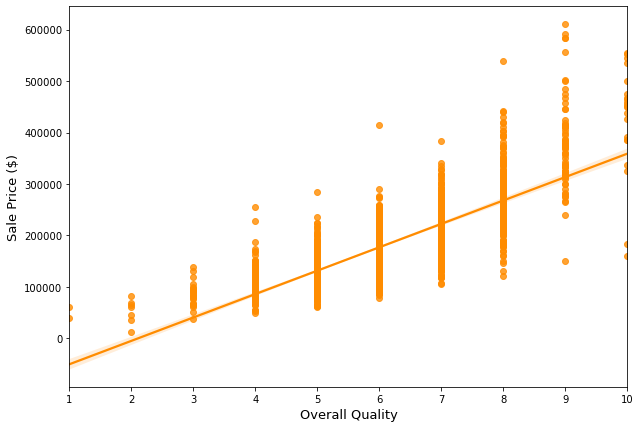

In [8]:
# check the relationship specifically between overall quality and sale price

plt.figure(figsize = (10, 7))
sns.regplot(x = 'overall_qual', y = 'saleprice', data = house , color = 'darkorange', fit_reg = True, logx = False)
plt.xlabel('Overall Quality', size = 13)
plt.ylabel('Sale Price ($)', size = 13)
plt.savefig('../images/Quality.png');

# log the price?

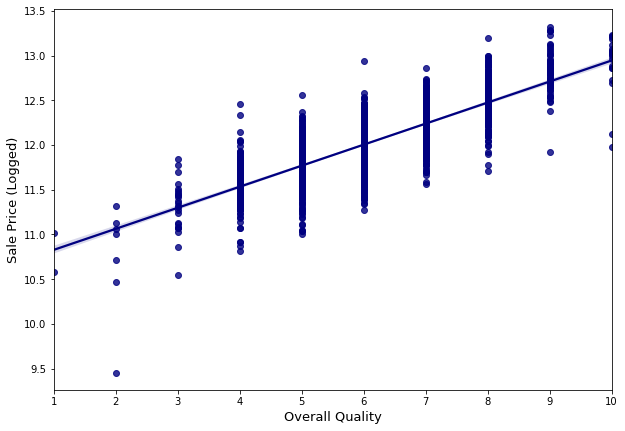

In [9]:
# overall quality with sale price, logged

plt.figure(figsize = (10, 7))
sns.regplot(x = 'overall_qual', y = np.log(house['saleprice']), data = house , color = 'navy', fit_reg = True, logx = False)
plt.xlabel('Overall Quality', size = 13)
plt.ylabel('Sale Price (Logged)', size = 13)
plt.savefig('../images/Quality_logPrice.png');

In [10]:
# check the sale information

house['yr_sold'].describe()

count    1928.000000
mean     2007.768154
std         1.311671
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yr_sold, dtype: float64

In [11]:
# check the building information

house['year_built'].describe()

count    1928.000000
mean     1970.539419
std        29.677780
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      1999.000000
max      2009.000000
Name: year_built, dtype: float64

In [12]:
# make a column with how old the house is

house['age_sale'] = house['yr_sold'] - house['year_built']

In [13]:
# repeat above for test dataset

test['age_sale'] = test['yr_sold'] - test['year_built']

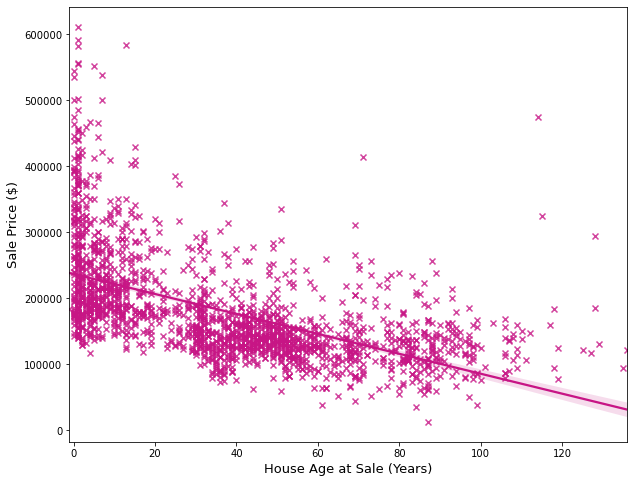

In [14]:
# the relationship between how old the house is and the sale price

plt.figure(figsize = (10, 8))
sns.regplot(x = 'age_sale', y = 'saleprice', data = house, marker = 'x', color = 'mediumvioletred')
plt.xlabel('House Age at Sale (Years)', size = 13)
plt.ylabel('Sale Price ($)', size = 13)
plt.savefig('../images/AgeAtSale.png');

# inverse log relationship?  --> log price

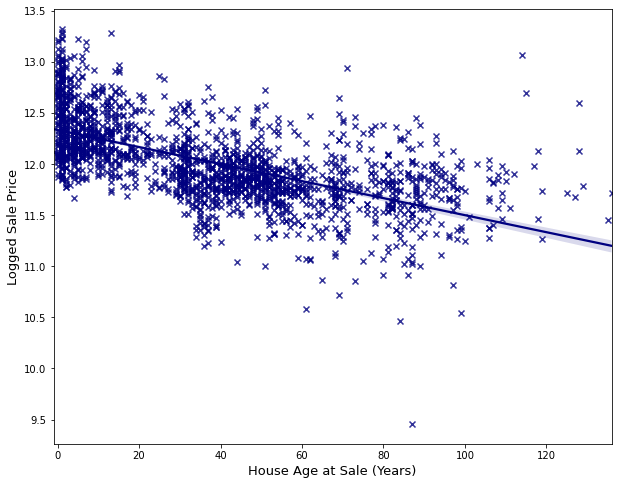

In [15]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'age_sale', y = np.log(house['saleprice']), data = house, marker = 'x', color = 'navy')
plt.xlabel('House Age at Sale (Years)', size = 13)
plt.ylabel('Logged Sale Price', size = 13)
plt.savefig('../images/AgeAtSaleLog.png');

In [16]:
# check remodel year

house['year_remod/add'].unique()

array([2005, 1997, 2007, 1993, 2002, 2006, 1959, 1952, 1969, 1971, 1950,
       1963, 1977, 1968, 2000, 1955, 1961, 2009, 1995, 1981, 1996, 2008,
       1958, 1973, 1994, 1965, 1978, 1954, 1960, 2004, 1970, 1951, 1975,
       1953, 2001, 2010, 2003, 1979, 1964, 1956, 1972, 1957, 1992, 1962,
       1998, 1990, 1967, 1985, 1987, 1988, 1976, 1984, 1999, 1966, 1980,
       1989, 1991, 1986, 1983, 1974, 1982])

In [17]:
# make a column to store remodel age information

house['remod_age'] = house['yr_sold'] - house['year_remod/add']

In [18]:
# repeat above step for the test set

test['remod_age'] = test['yr_sold'] - test['year_remod/add']

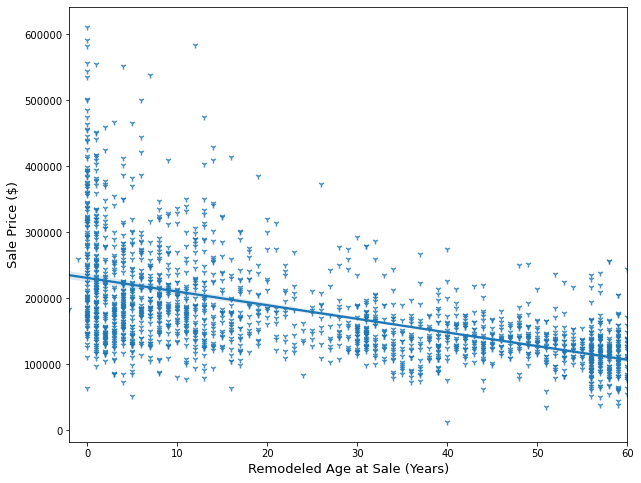

In [20]:
# check if there's any relationship between how long it has been from last remodeled and sale price

plt.figure(figsize = (10, 8))
sns.regplot(x = 'remod_age', y = 'saleprice', data = house, marker = '1', color = 'tab:blue')
plt.xlabel('Remodeled Age at Sale (Years)', size = 13)
plt.ylabel('Sale Price ($)', size = 13)
plt.savefig('../images/RemodAtSale.png');

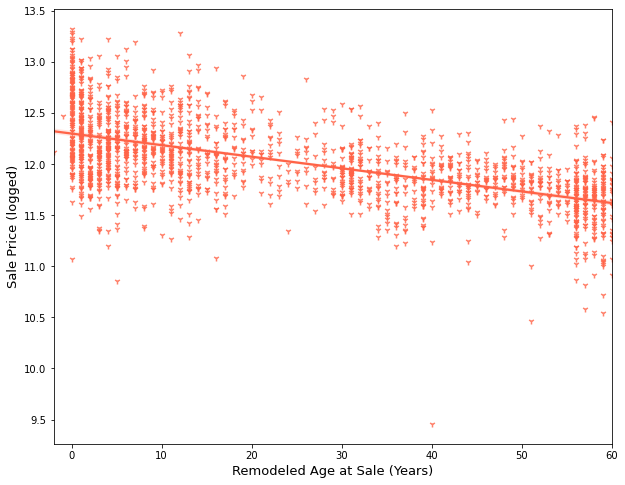

In [21]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'remod_age', y = np.log(house['saleprice']), data = house, marker = '1', color = 'tomato')
plt.xlabel('Remodeled Age at Sale (Years)', size = 13)
plt.ylabel('Sale Price (logged)', size = 13)
plt.savefig('../images/RemodAtSaleLog.png');

In [22]:
# check neighborhood information

nh = house.groupby('neighborhood')['saleprice'].median().sort_values()
house['saleprice'].median()

160000.0

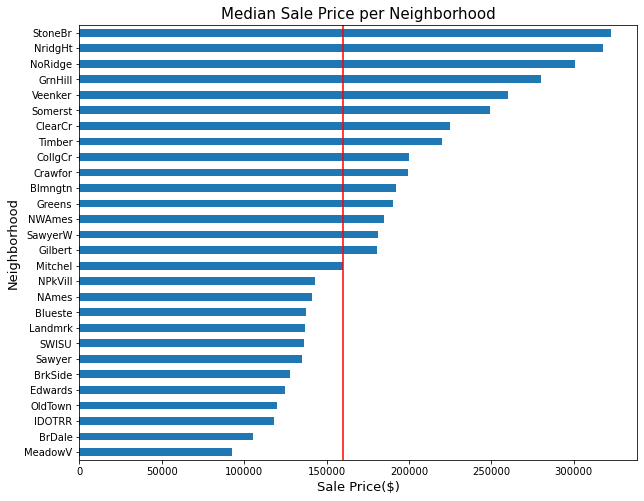

In [23]:
# check if there is any effect from neighborhood

plt.figure(figsize = (10, 8))

nh.plot(kind = 'barh')
plt.axvline(x = house['saleprice'].median(), color = 'red')
plt.xlabel('Sale Price($)', size = 13)
plt.ylabel('Neighborhood', size = 13)
plt.title('Median Sale Price per Neighborhood', size = 15)
plt.savefig('../images/NHmedianComp.png');

# --> Neighborhood values should get dummy values of 0, 1.

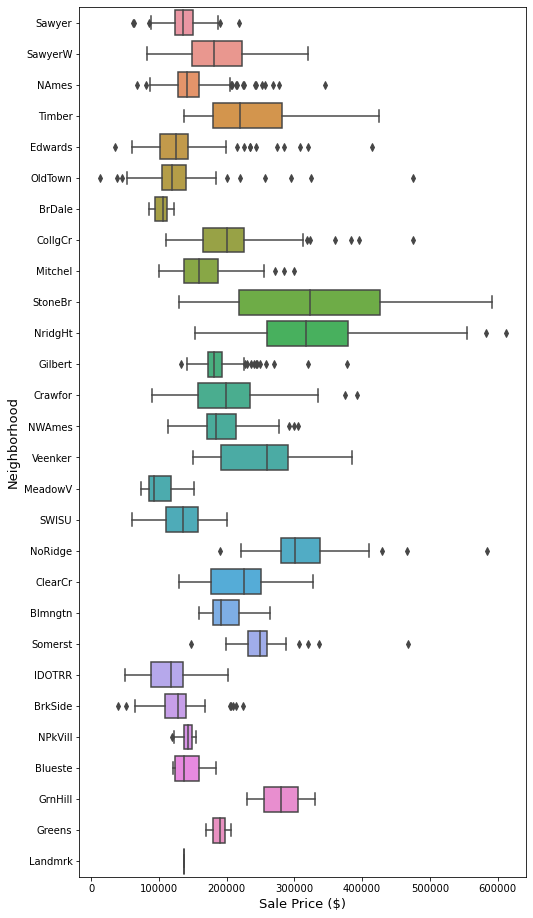

In [24]:
# sale price distribution by neighborhood

plt.figure(figsize = (8, 16))

sns.boxplot(x = 'saleprice', y = 'neighborhood', data = house)
plt.xlabel('Sale Price ($)', size = 13)
plt.ylabel('Neighborhood', size = 13)
plt.savefig('../images/NHBoxPlots.png');

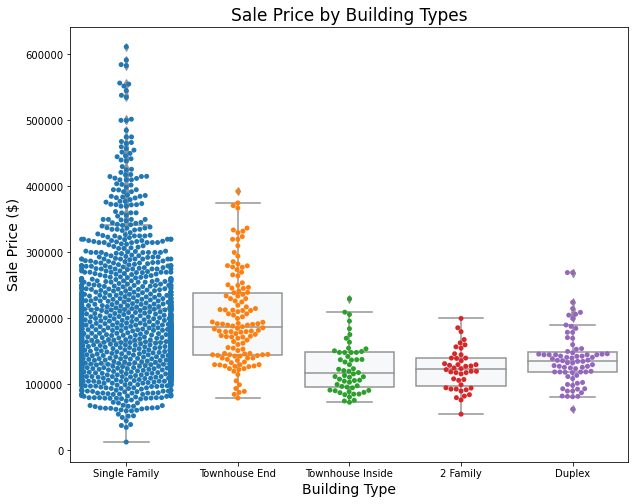

In [25]:
# check building type to sale price

plt.figure(figsize = (10, 8))

sns.swarmplot(x = 'bldg_type', y = 'saleprice', data = house)
sns.boxplot(x = 'bldg_type', y = 'saleprice', data = house, color = 'aliceblue', saturation = 0.2)
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Single Family', 'Townhouse End', 'Townhouse Inside', '2 Family', 'Duplex'])
plt.xlabel('Building Type', size = 14)
plt.ylabel('Sale Price ($)', size = 14)
plt.title('Sale Price by Building Types', size=17)
plt.savefig('../images/BldgTypes.png');

<Figure size 864x576 with 0 Axes>

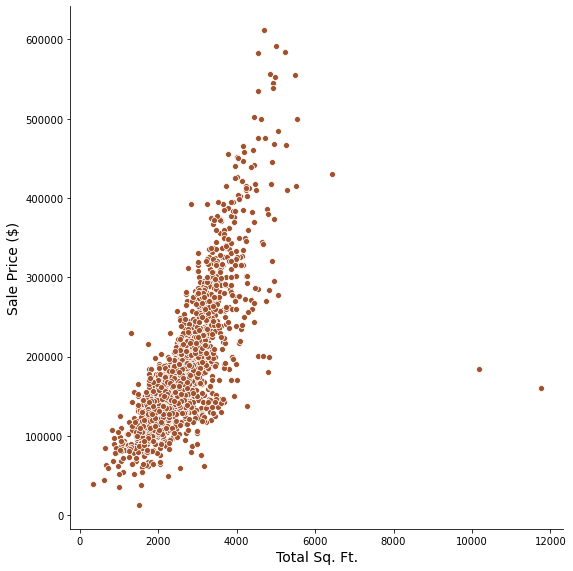

In [27]:
# total sq ft to sale price

plt.figure(figsize = (12, 8))
sns.relplot(x = 'total_sf', y = 'saleprice', data = house, color = 'sienna', height = 8);
plt.xlabel('Total Sq. Ft.', size = 14)
plt.ylabel('Sale Price ($)', size = 14)
plt.savefig('../images/sf_price_outlier.png')
plt.show();

In [28]:
# identify outliers

house.loc[house['total_sf'] > 8000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf,age_sale,remod_age
896,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,...,0,480,0,1,2008,New,160000,11752.0,0,0
1769,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,...,0,0,17000,10,2007,New,183850,10190.0,-1,-2


In [29]:
# drop outliers

house.drop(house[house['total_sf'] > 8000].index, inplace = True)

In [30]:
# check house style

house['house_style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

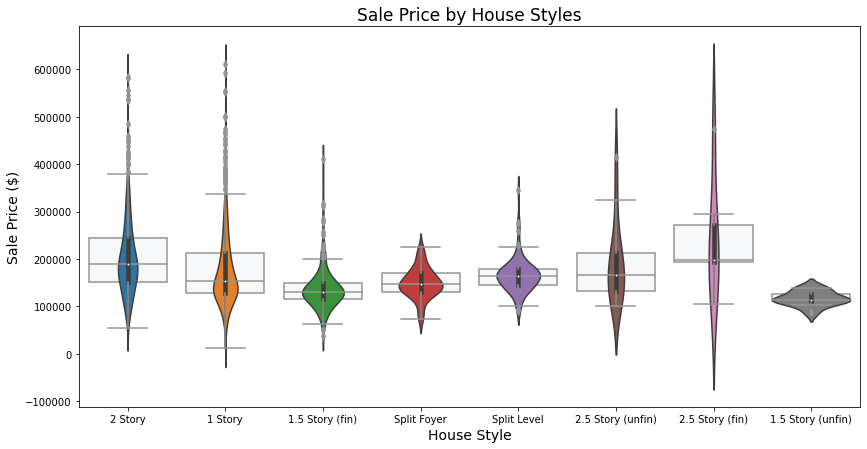

In [31]:
# house style to sale price

plt.figure(figsize = (14, 7))

sns.violinplot(x = 'house_style', y = 'saleprice', data = house)
sns.boxplot(x = 'house_style', y = 'saleprice', data = house, color = 'aliceblue', saturation = 0.2)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], 
           labels = ['2 Story', '1 Story', '1.5 Story (fin)', 'Split Foyer', 'Split Level', '2.5 Story (unfin)', '2.5 Story (fin)', '1.5 Story (unfin)'])
plt.xlabel('House Style', size = 14)
plt.ylabel('Sale Price ($)', size = 14)
plt.title('Sale Price by House Styles', size=17)
plt.savefig('../images/housestyle.png');

In [32]:
# check central air (y, n) to sale price

house['central_air'] = house['central_air'].apply(lambda x: 1 if x == 'Y' else 0)
test['central_air'] = test['central_air'].apply(lambda x: 1 if x == 'Y' else 0)

In [33]:
house['central_air'].unique()

array([1, 0])

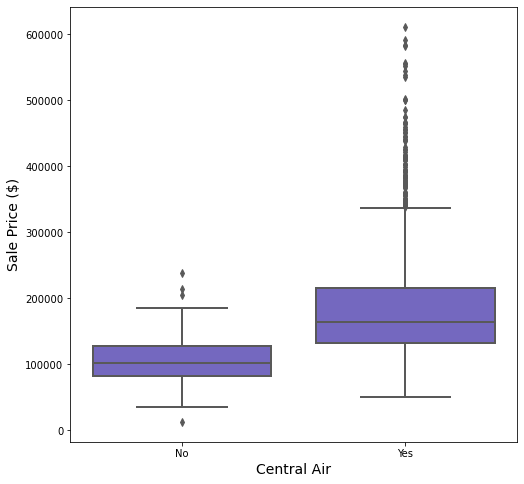

In [34]:
# check whether having central air has an impact on sale price

plt.figure(figsize = (8, 8))
sns.boxplot(x = 'central_air', y = 'saleprice', data = house, color = 'slateblue', orient = 'v', linewidth = 2);
plt.xlabel('Central Air', size = 14)
plt.ylabel('Sale Price ($)', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.savefig('../images/centralair.png')
plt.show()

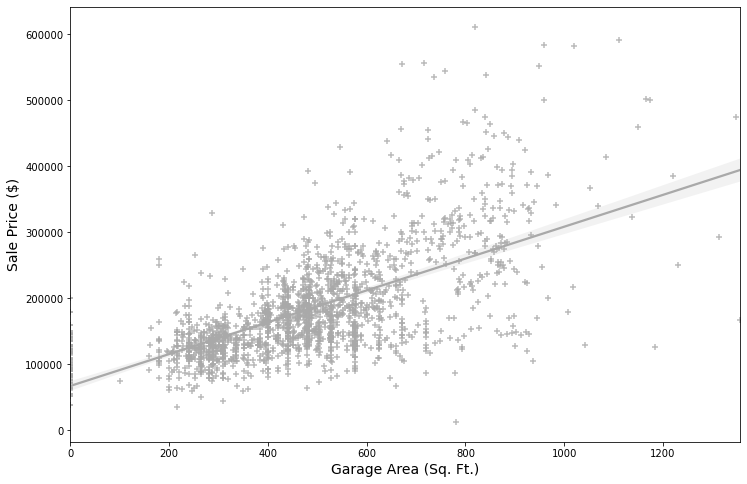

In [35]:
# relationship between how big the garage is and sale price

plt.figure(figsize = (12, 8))
sns.regplot(x = 'garage_area', y = 'saleprice', data = house, color = 'darkgrey', marker = '+');
plt.xlabel('Garage Area (Sq. Ft.)', size = 14)
plt.ylabel('Sale Price ($)', size = 14)
plt.savefig('../images/garage.png')
plt.show()

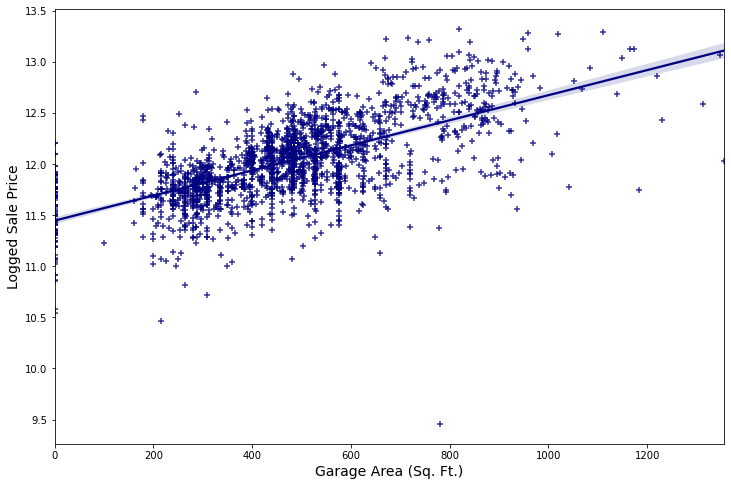

In [36]:
# garage area to logged sale price

plt.figure(figsize = (12, 8))
sns.regplot(x = 'garage_area', y = np.log(house['saleprice']), data = house, color = 'navy', marker = '+');
plt.xlabel('Garage Area (Sq. Ft.)', size = 14)
plt.ylabel('Logged Sale Price', size = 14)
plt.savefig('../images/garage_logPrice.png')
plt.show()

In [46]:
house.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf,age_sale,remod_age
0,109,533352170,60,RL,70.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,130500,2204.0,34,5
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,4,2009,WD,220000,3035.0,13,12
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,1,2010,WD,109000,2114.0,57,3
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,174000,1828.0,4,3
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,138500,2121.0,110,17


In [50]:
print(len(house['total_sf']))
len(house['saleprice'])

1926


1926

In [56]:
len(house['neighborhood'])

1926

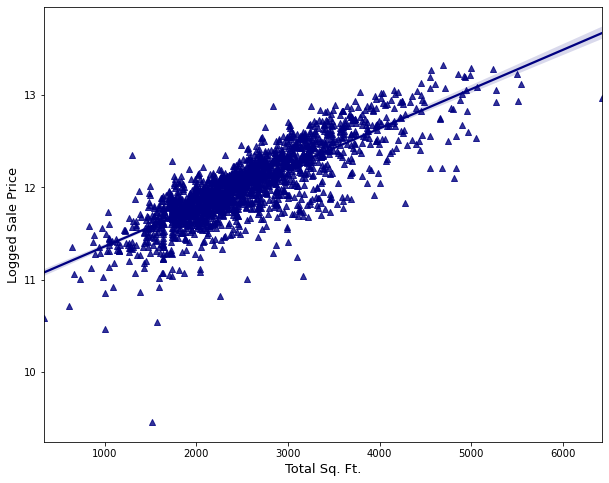

In [39]:
# sq ft to logged sale price

plt.figure(figsize = (10, 8))
sns.regplot(x = 'total_sf', y = np.log(house['saleprice']), data = house, color = 'navy', marker = '^')
plt.xlabel('Total Sq. Ft.', size = 13)
plt.ylabel('Logged Sale Price', size = 13)
plt.savefig('../images/SF_logprice.png');

In [47]:
# override clean dataset with new features

house.to_csv('../datasets/train_clean.csv', index = False)
test.to_csv('../datasets/test_clean.csv', index = False)